### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

#### Collect Fashion mnist data from tf.keras.datasets 

In [28]:
import keras
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

#### Change train and test labels into one-hot vectors

In [29]:
# dataset have 10 classes and each label is an integer between 0 and 9:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [30]:
print(trainY.shape)
print('First 5 examples are: ', trainY[0:5])

(60000, 10)
First 5 examples are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [31]:
import numpy as np
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

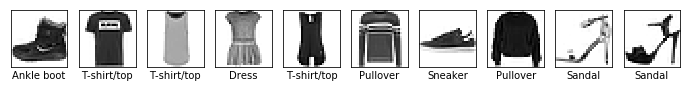

label for each of the above image: 
 [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [32]:
labelCode = []
plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
   # plt.imshow(trainX[i], cmap='Greys') 
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    label = np.where(trainY[i] == 1)[0][0]
    plt.xlabel(class_names[label])
    labelCode.append(label)
plt.show()

print("label for each of the above image: \n", labelCode)

In [33]:
# input size
print("Input Dimension: %d x %d" %(trainX.shape[1],trainX.shape[2]))

Input Dimension: 28 x 28


In [34]:
print("Target Size: ", trainY.shape)

Target Size:  (60000, 10)


#### Build the Graph

#### Initialize model, reshape & normalize data

In [35]:
# # normalize inputs from 0-255 to 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [46]:
#Initialize Sequential model
model = keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(keras.layers.Reshape((784,),input_shape=(trainX.shape[1],trainX.shape[2],)))

#Normalize the data - batch wise
model.add(keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [47]:
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))

#Dropout layer
model.add(keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [48]:
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_12 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
_________________________________________________________________


In [53]:
# Fit the model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=55, batch_size=55, verbose= 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/55
60000/60000 [==============================] - 7s 112us/step - loss: 0.2612 - acc: 0.9019 - val_loss: 0.3447 - val_acc: 0.8804
Epoch 2/55
60000/60000 [==============================] - 7s 111us/step - loss: 0.2349 - acc: 0.9113 - val_loss: 0.3349 - val_acc: 0.8850
Epoch 3/55
60000/60000 [==============================] - 7s 112us/step - loss: 0.2272 - acc: 0.9131 - val_loss: 0.3494 - val_acc: 0.8832
Epoch 4/55
60000/60000 [==============================] - 7s 112us/step - loss: 0.2181 - acc: 0.9166 - val_loss: 0.3339 - val_acc: 0.8880
Epoch 5/55
60000/60000 [==============================] - 7s 120us/step - loss: 0.2117 - acc: 0.9199 - val_loss: 0.3319 - val_acc: 0.8900
Epoch 6/55
60000/60000 [==============================] - 7s 113us/step - loss: 0.2034 - acc: 0.9217 - val_loss: 0.3483 - val_acc: 0.8884
Epoch 7/55
60000/60000 [==============================] - 7s 114us/step - loss: 0.1970 - acc: 0.9240 - val_loss: 0.3471 - 

In [54]:
test_loss, test_acc = model.evaluate(testX, testY)
print('\nTest accuracy: %0.2f' %(test_acc*100))

10000/10000 [==============================] - 1s 53us/step

Test accuracy: 89.17


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


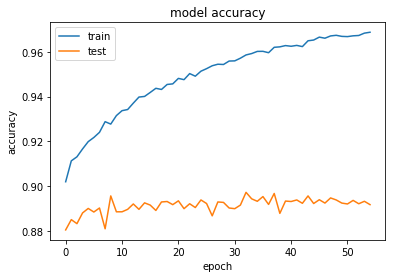

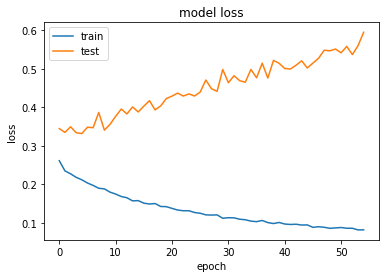

In [55]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# we can observe loss in test dats is not smooth and there are slight spikes during epoch.. 
# further batch normalization in each hidden later can improve these spikes.